##  Polynomial Predict  Global_ Average_Temperature based on linear regression

In [183]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [184]:
csv_Data=pd.read_csv('Global_Average_Temperature.csv')

In [185]:
csv_Data

Year  GlobalAverageTemperatureValue
0    1880                          -0.20
1    1881                          -0.12
2    1882                          -0.10
3    1882                          -0.19
4    1883                          -0.21
..    ...                            ...
267  2014                           0.79
268  2015                           0.87
269  2015                           0.85
270  2016                           0.99
271  2016                           0.91

[272 rows x 2 columns]

In [186]:
csv_Data.describe()

Year  GlobalAverageTemperatureValue
count   272.000000                     272.000000
mean   1948.514706                       0.025662
std      39.362350                       0.321865
min    1880.000000                      -0.470000
25%    1914.750000                      -0.220000
50%    1948.500000                      -0.050000
75%    1982.250000                       0.210000
max    2016.000000                       0.990000

In [187]:
csv_Data.head()

Year  GlobalAverageTemperatureValue
0  1880                          -0.20
1  1881                          -0.12
2  1882                          -0.10
3  1882                          -0.19
4  1883                          -0.21

In [188]:
x1= csv_Data.iloc[:, 0:1].values
y =csv_Data.iloc[:, 1].values

y=csv_Data['GlobalAverageTemperatureValue']
x1=csv_Data['Year']

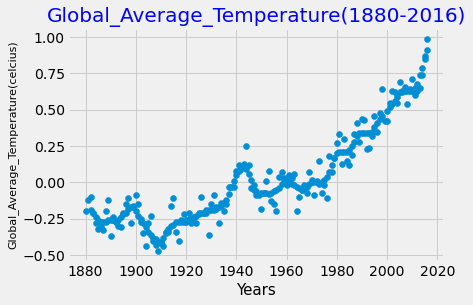

In [189]:
plt.scatter(x1,y)
plt.title('Global_Average_Temperature(1880-2016)',size=20,color='b')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Global_Average_Temperature(celcius)',fontsize=11)
plt.show()

In [190]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     GlobalAverageTemperatureValue   R-squared:                       0.786
Model:                                       OLS   Adj. R-squared:                  0.785
Method:                            Least Squares   F-statistic:                     993.1
Date:                           Sat, 24 Jul 2021   Prob (F-statistic):           1.90e-92
Time:                                   14:44:01   Log-Likelihood:                 132.73
No. Observations:                            272   AIC:                            -261.5
Df Residuals:                                270   BIC:                            -254.2
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.1021      0.448    -31.450      0.000     -14.985     -13.219
Year           0.0073      0.000     31.513      0.000       0.007       0.008
==============================================================================
Omnibus:                        8.252   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.864
Skew:                           0.367   Prob(JB):                       0.0196
Kurtosis:                       2.606   Cond. No.                     9.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

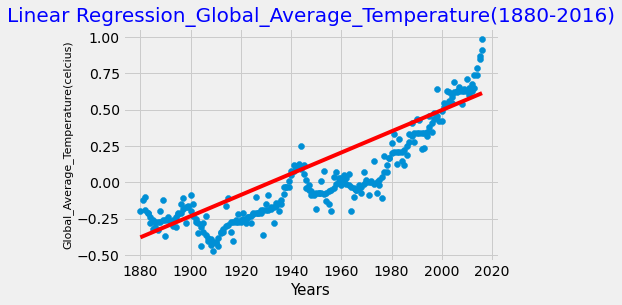

In [191]:
plt.scatter(x1,y)
yhat=-14.1021 + 0.0073*x1
fig=plt.plot(x1,yhat,lw=4,c='red',label='regression line')
plt.title('Linear Regression_Global_Average_Temperature(1880-2016)',size=20,color='b')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Global_Average_Temperature(celcius)',fontsize=11)
plt.show()

In [192]:

x1 = x1[:,np.newaxis]
y = y[:,np.newaxis]


polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x1)
model = LinearRegression()

fitted_model = model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)


0.09772483826495852
0.907474614668198


<ipython-input-192-6a38dd6827b7>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x1 = x1[:,np.newaxis]
<ipython-input-192-6a38dd6827b7>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


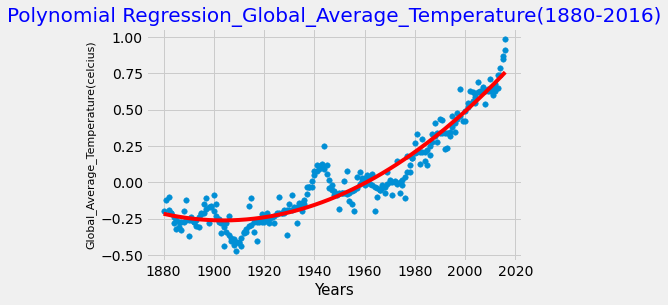

In [193]:
plt.scatter(x1, y, s=30)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x1,y_poly_pred), key=sort_axis)
x1, y_poly_pred = zip(*sorted_zip)
plt.plot(x1, y_poly_pred, color='r')
plt.title('Polynomial Regression_Global_Average_Temperature(1880-2016)',size=20,color='b')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Global_Average_Temperature(celcius)',fontsize=11)

plt.show()

